<a href="https://colab.research.google.com/github/Swathi014/ZEOTAP-Data-Science-Assignment-eCommerce-Transactions/blob/main/Swathi_P_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Internship/Zeotap/Dataset/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Internship/Zeotap/Dataset/Transactions.csv')

In [4]:
# Prepare data for clustering
transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

print(transaction_summary)

    CustomerID  TotalValue  Quantity
0        C0001     3354.52        12
1        C0002     1862.74        10
2        C0003     2725.38        14
3        C0004     5354.88        23
4        C0005     2034.24         7
..         ...         ...       ...
194      C0196     4982.88        12
195      C0197     1928.65         9
196      C0198      931.83         3
197      C0199     1979.28         9
198      C0200     4758.60        16

[199 rows x 3 columns]


In [5]:
# Merge with customer data
clustering_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left').fillna(0)
print(clustering_data)

    CustomerID        CustomerName         Region  SignupDate  TotalValue  \
0        C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1        C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2        C0003      Michael Rivera  South America  2024-03-07     2725.38   
3        C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4        C0005         Laura Weber           Asia  2022-08-15     2034.24   
..         ...                 ...            ...         ...         ...   
195      C0196         Laura Watts         Europe  2022-06-07     4982.88   
196      C0197    Christina Harvey         Europe  2023-03-21     1928.65   
197      C0198         Rebecca Ray         Europe  2022-02-27      931.83   
198      C0199      Andrea Jenkins         Europe  2022-12-03     1979.28   
199      C0200         Kelly Cross           Asia  2023-06-11     4758.60   

     Quantity  
0        12.0  
1        10.0  
2        14.0  
3        23

In [7]:
# Feature selection
clustering_features = pd.get_dummies(clustering_data[['Region', 'TotalValue', 'Quantity']], columns=['Region'])
print(clustering_features)

     TotalValue  Quantity  Region_Asia  Region_Europe  Region_North America  \
0       3354.52      12.0        False          False                 False   
1       1862.74      10.0         True          False                 False   
2       2725.38      14.0        False          False                 False   
3       5354.88      23.0        False          False                 False   
4       2034.24       7.0         True          False                 False   
..          ...       ...          ...            ...                   ...   
195     4982.88      12.0        False           True                 False   
196     1928.65       9.0        False           True                 False   
197      931.83       3.0        False           True                 False   
198     1979.28       9.0        False           True                 False   
199     4758.60      16.0         True          False                 False   

     Region_South America  
0                    Tr

In [8]:
# Determine optimal number of clusters using the elbow and silhouette methods
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_features, kmeans.labels_))

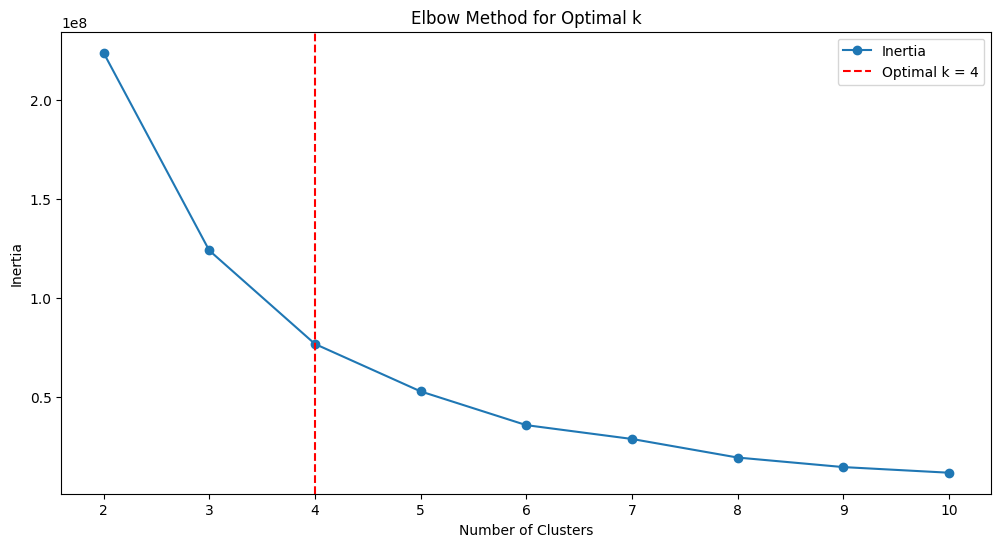

In [9]:
# Plot elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertia, marker='o', label='Inertia')
plt.axvline(4, color='red', linestyle='--', label='Optimal k = 4')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

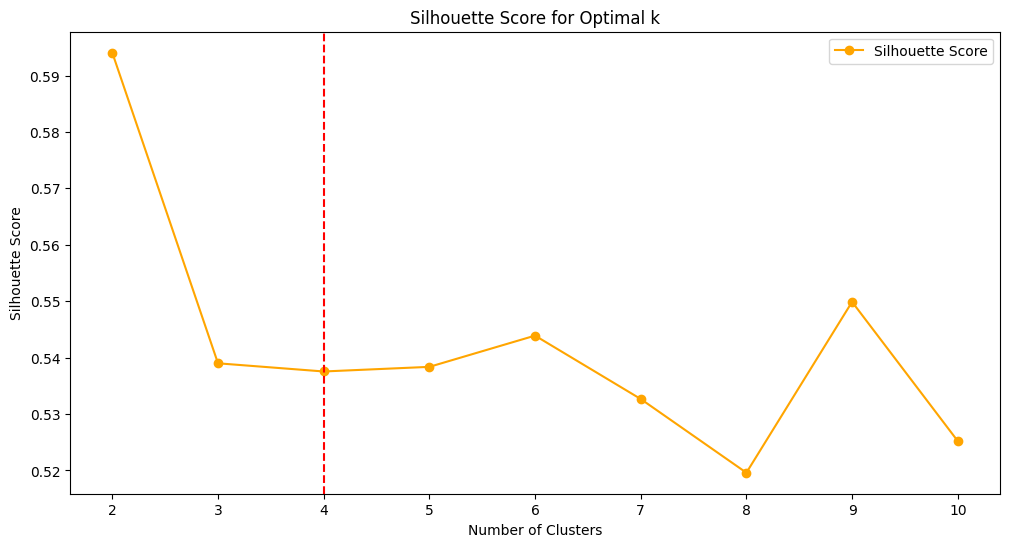

In [10]:
# Plot silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.axvline(4, color='red', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [11]:
# Fit KMeans with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_features)

In [12]:
# Calculate DB Index
db_index = davies_bouldin_score(clustering_features, clustering_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.5500517525336086


In [13]:
# PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(clustering_features)
clustering_data['PCA1'] = pca_features[:, 0]
clustering_data['PCA2'] = pca_features[:, 1]

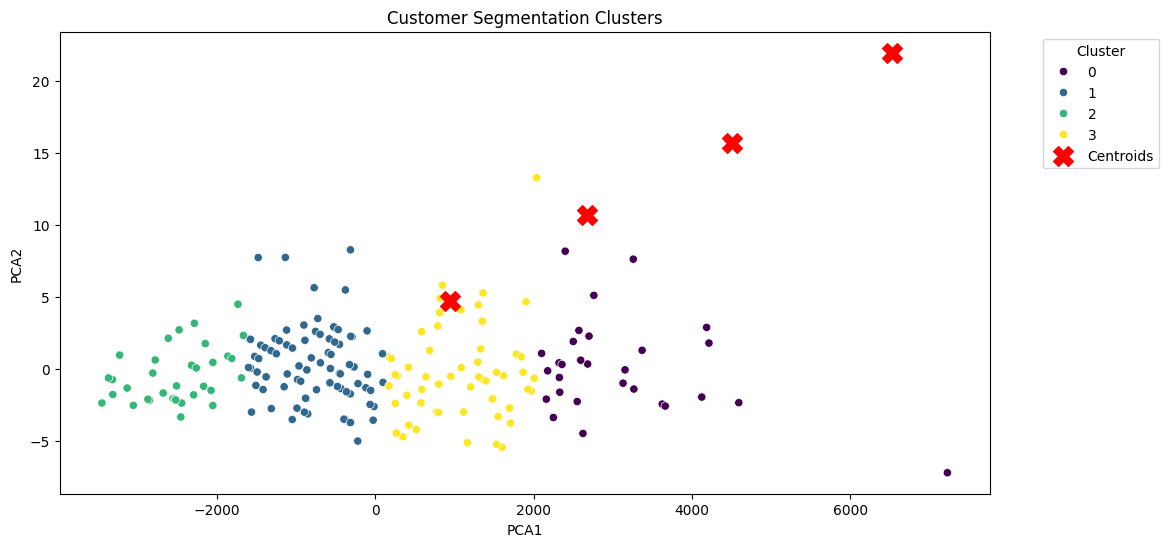

In [14]:
# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=clustering_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
# Save clustering results
clustering_data.to_csv('Swathi_P_Clustering.csv', index=False)